# Data Cleaning

In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
#loading the data and checking out the dataframe

data = pd.read_csv('googleplaystore.csv')
data.head(10)
print(data.shape)
data.head(5)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#Understanding the data (looking at factors)

codes, uniques = pd.factorize(data["Category"])
print(uniques)

codes, uniques = pd.factorize(data["Rating"])
print(uniques)

codes, uniques = pd.factorize(data["Type"])
print(uniques)

codes, uniques = pd.factorize(data["Price"])
print(uniques)

codes, uniques = pd.factorize(data["Genres"])
print(uniques)

codes, uniques = pd.factorize(data["Installs"])
print(uniques)

codes, uniques = pd.factorize(data["Size"])
print(uniques)


Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK',
       'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING',
       'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION',
       'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9'],
      dtype='object')
Float64Index([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4.0,
               4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5.0,  2.6,  3.0,
               1.9,  2.5,  2.8,  2.7,  1.0,  2.9,  2.3,  2.2,  1.7,  2.0,  1.8,
               2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19.0],
             dtype='float64')
Index(['Free', 'Paid', '0'], dtype='object')
Index(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2

In [6]:
#Data Cleaning


#droping duplicates on "app"
data.drop_duplicates(subset='App', inplace=True)

#removing + and , and free from install
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data = data[data["Installs"] != "Free"]
data['Installs'] = data['Installs'].apply(lambda x: int(x))


#removing the faulty ratings
data = data[data["Rating"] != "19.0"]

#removing 1.9 from category
data = data[data["Category"] != "1.9"]

#is "reviews" numeric? Yes
pd.to_numeric(data['Reviews'], errors='coerce').notnull().all()

#fixing "size"
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

#fixing "price"
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

#making "reviews" int
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
data.to_csv(r"clean_data.csv")
df = pd.read_csv('clean_data.csv')
dc = pd.read_csv('clean_data.csv')

In [11]:
df.shape

(9659, 14)

In [12]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,9659.000000,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,5666.172896,4.173243,2.165926e+05,20.395289,7.777507e+06,1.099299
std,3102.362863,0.536625,1.831320e+06,21.827542,5.375828e+07,16.852152
min,0.000000,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,5814.000000,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


In [14]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [15]:
df['Type'] = df['Type'].astype(str)
df['Content Rating'] = df['Content Rating'].astype(str)
label_quality = LabelEncoder()
df['Type'] = label_quality.fit_transform(df['Type'])
df['Content Rating'] = label_quality.fit_transform(df['Content Rating'])
df.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,0,0.0,1,Art & Design,"March 26, 2017",1.0,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,0,0.0,1,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,0,0.0,1,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,0,0.0,1,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,0,0.0,1,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [16]:
dc

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
df["Type"].value_counts()

0    8902
1     756
2       1
Name: Type, dtype: int64

In [18]:
df["Content Rating"].value_counts()

1    7903
4    1036
3     393
2     322
0       3
5       2
Name: Content Rating, dtype: int64

# Data Analysis

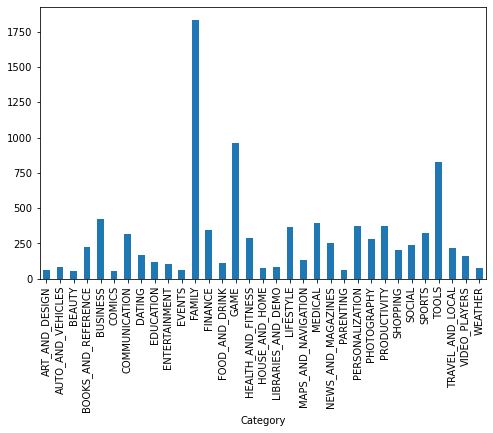

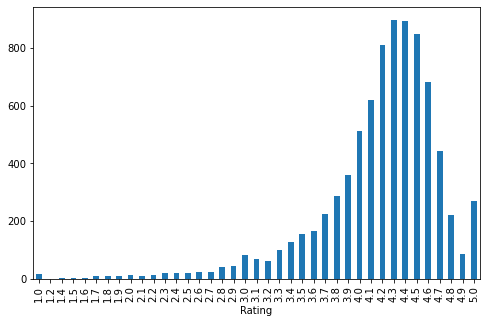

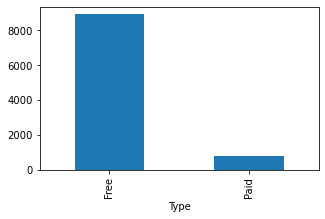

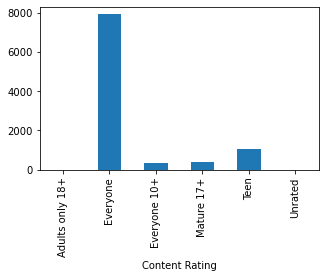

In [51]:
#EDA
plt.rcParams['figure.figsize'] = [8, 5]

data.groupby("Category").size().plot(kind='bar')
plt.show()

data.groupby("Rating").size().plot(kind='bar')
plt.show()

plt.rcParams['figure.figsize'] = [5, 3]
data.groupby("Type").size().plot(kind='bar')
plt.show()

data.groupby("Content Rating").size().plot(kind='bar')
plt.show()

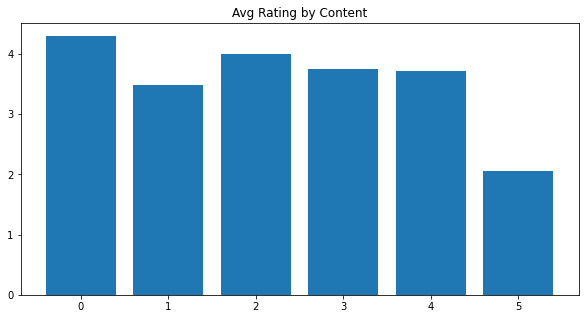

In [52]:
plt.rcParams['figure.figsize'] = [10, 5]
type_count = df['Rating'].groupby(df['Content Rating']).size()
avg_type = df['Rating'].groupby(df['Content Rating']).sum()/type_count
avg_type = dict(avg_type)
plt.bar(avg_type.keys(), avg_type.values());
plt.title('Avg Rating by Content');

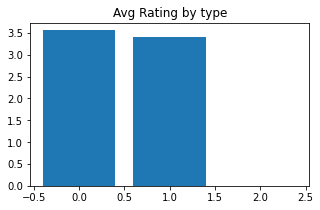

In [53]:
plt.rcParams['figure.figsize'] = [5, 3]
type_count = df['Rating'].groupby(df['Type']).size()
avg_type = df['Rating'].groupby(df['Type']).sum()/type_count
avg_type = dict(avg_type)
plt.bar(avg_type.keys(), avg_type.values());
plt.title('Avg Rating by type');

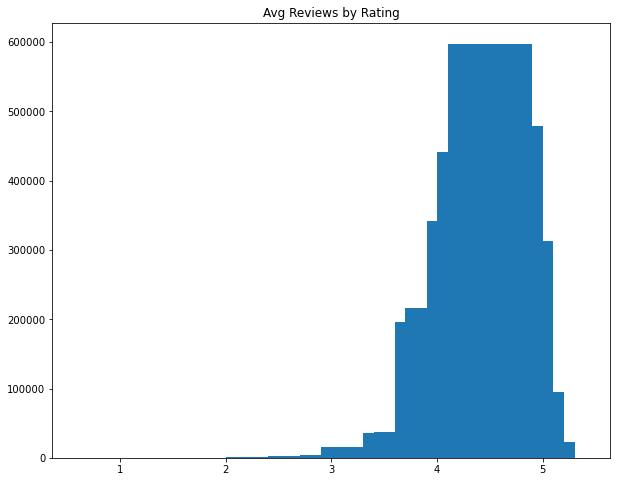

In [54]:
plt.rcParams['figure.figsize'] = [10, 8]
type_count = df['Reviews'].groupby(df['Rating']).size()
avg_type = df['Reviews'].groupby(df['Rating']).sum()/type_count
avg_type = dict(avg_type)
plt.bar(avg_type.keys(), avg_type.values());
plt.title('Avg Reviews by Rating');

# KNN General 

In [19]:
import pandas as pd
import numpy as no
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [20]:
knn_df = df.drop(columns=['Unnamed: 0', 'App', 'Category', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])
knn_df

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,159,19.0,10000,0,0.0
1,3.9,967,14.0,500000,0,0.0
2,4.7,87510,8.7,5000000,0,0.0
3,4.5,215644,25.0,50000000,0,0.0
4,4.3,967,2.8,100000,0,0.0
...,...,...,...,...,...,...
9654,4.5,38,53.0,5000,0,0.0
9655,5.0,4,3.6,100,0,0.0
9656,NaN,3,9.5,1000,0,0.0
9657,4.5,114,NaN,1000,0,0.0


In [21]:
label_quality = LabelEncoder()
knn_df['Type'] = knn_df['Type'].astype(str)
knn_df['Type'] = label_quality.fit_transform(knn_df['Type'])
knn_df

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,159,19.0,10000,0,0.0
1,3.9,967,14.0,500000,0,0.0
2,4.7,87510,8.7,5000000,0,0.0
3,4.5,215644,25.0,50000000,0,0.0
4,4.3,967,2.8,100000,0,0.0
...,...,...,...,...,...,...
9654,4.5,38,53.0,5000,0,0.0
9655,5.0,4,3.6,100,0,0.0
9656,NaN,3,9.5,1000,0,0.0
9657,4.5,114,NaN,1000,0,0.0


In [22]:
Na_not_accepted = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

for column in Na_not_accepted:
    mean = int(knn_df[column].mean(skipna=True))
    knn_df[column] = knn_df[column].replace(np.NaN, mean)

In [23]:
X = knn_df.iloc[:, 0:3]
y = knn_df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)

In [24]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
import math
math.sqrt(len(y_test))

43.95452195167182

In [26]:
classifier = KNeighborsClassifier(n_neighbors=43, p=2, metric = 'euclidean')

In [27]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=43)

In [28]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1787,    0],
       [ 145,    0]])

In [30]:
accuracy_score(y_test, y_pred)

0.9249482401656315

# KNN Classifying Installs

In [31]:
#creating dataframe with just rating, reviews, size, installs, type, price
knn_ins = df.drop(columns=['Unnamed: 0', 'App', 'Category', 'Content Rating', 'Genres', 'Price', 'Last Updated', 'Current Ver', 'Android Ver'])

In [32]:
knn_ins = knn_ins.drop(columns = ['Type'])

In [33]:
knn_ins = knn_ins.dropna()
knn_ins

,Rating,Reviews,Size,Installs
0,4.1,159,19.000,10000
1,3.9,967,14.000,500000
2,4.7,87510,8.700,5000000
3,4.5,215644,25.000,50000000
4,4.3,967,2.800,100000
...,...,...,...,...
9651,4.8,44,0.619,1000
9652,4.0,7,2.600,500
9654,4.5,38,53.000,5000
9655,5.0,4,3.600,100


In [34]:
X = knn_df.iloc[:, 0:3]
y = knn_df.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9654        5000
9655         100
9656        1000
9657        1000
9658    10000000
Name: Installs, Length: 9659, dtype: int64

In [35]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train


array([[-0.29172205, -0.12359318,  0.37009711],
       [-0.29172205, -0.12359318, -0.69364964],
       [-1.69691877, -0.1225152 , -0.0690644 ],
       ...,
       [-0.69320683, -0.12331094,  0.76046289],
       [ 0.71198989, -0.12286989, -0.98442335],
       [-0.29172205, -0.10748252, -0.02026867]])

In [36]:
#running the model and assessing accuracy
classifier = KNeighborsClassifier(n_neighbors=23, p=2, metric = 'euclidean') #model most accurate at this n_neighbor value

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#print(np.unique(y_pred))
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))



0.2908902691511387


# Classifying Rating

In [37]:
#creating dataframe classifying rating
knn_rating_df = knn_df[['Reviews', 'Size', 'Installs', 'Rating']]
knn_rating_df = knn_rating_df.dropna()

In [38]:
#creating bins for rating

#we tried other bin, this works better


bins = (0, 4, 5)
group_name = ['bad', 'good']
knn_rating_df['Rating'] = pd.cut(knn_rating_df['Rating'], bins = bins, labels = group_name)
knn_rating_df['Rating'].unique()

[good, bad]
Categories (2, object): [bad < good]

In [39]:
#splitting data into training x/y and test x/y
X = knn_rating_df.iloc[:, 0:3]
y = knn_rating_df.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

5476     bad
9311     bad
159      bad
460     good
6674    good
        ... 
7891    good
9225     bad
4859     bad
3264    good
2732     bad
Name: Rating, Length: 7727, dtype: category
Categories (2, object): [bad < good]

In [40]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [41]:
#running the model and assessing accuracy
classifier = KNeighborsClassifier(n_neighbors=41, p=2, metric = 'euclidean') #classifier is most accurate as this n

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.unique(y_pred))
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))

np.unique(y_pred)

knn_rating_df['Rating'].value_counts()

#accuracy of .6941, its better than classifying everything as good, which is 0.44

['bad' 'good']
0.6759834368530021


good    5773
bad     3886
Name: Rating, dtype: int64

# KNN Classifying Category

In [137]:
#creating dataframe with just rating, reviews, size, installs, type, price
knn_cat = df.drop(columns=['Unnamed: 0', 'App', 'Genres', 'Content Rating', 'Price', 'Type', 'Last Updated', 'Current Ver', 'Android Ver'])
knn_cat = knn_cat[['Rating','Reviews','Size','Installs', 'Category']]
knn_cat = knn_cat.dropna()

In [138]:
#factorizing Genres
#converting "type" to string and factorizing
label_quality = LabelEncoder()
knn_cat['Category'] = knn_cat['Category'].astype(str)
knn_cat['Category'] = label_quality.fit_transform(knn_cat['Category'])
knn_cat

,Rating,Reviews,Size,Installs,Category
0,4.1,159,19.000,10000,0
1,3.9,967,14.000,500000,0
2,4.7,87510,8.700,5000000,0
3,4.5,215644,25.000,50000000,0
4,4.3,967,2.800,100000,0
...,...,...,...,...,...
9651,4.8,44,0.619,1000,3
9652,4.0,7,2.600,500,11
9654,4.5,38,53.000,5000,11
9655,5.0,4,3.600,100,11


In [139]:
#splitting data into training x/y and test x/y
X = knn_cat.iloc[:, 0:4]
y = knn_cat.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    14
8500    25
1324    18
7139    11
7557    11
        ..
6764    11
4425    18
2253    24
3576    23
3730     4
Name: Category, Length: 5621, dtype: int64

In [140]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=47, p=2, metric = 'euclidean') #classifier is most accurate as this n

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.unique(y_pred))
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))

np.unique(y_pred)

knn_cat['Category'].value_counts()
#len(knn_cat['Category'])

test = 1512/7027
test

[ 4  6  7 11 12 14 18 20 23 29]
0.2411095305832148


0.21517005834637826

# KNN Classifying Content Rating

In [46]:
#creating dataframe with just rating, reviews, size, installs, type, price
knn_con = df.drop(columns=['Unnamed: 0', 'App', 'Genres', 'Category', 'Price', 'Type', 'Last Updated', 'Current Ver', 'Android Ver'])
knn_con = knn_con[['Rating','Reviews','Size','Installs', 'Content Rating']]
knn_con = knn_con.dropna()

In [47]:
#factorizing Content Rating
#converting "Content Rating" to string and factorizing
label_quality = LabelEncoder()
knn_con['Content Rating'] = label_quality.fit_transform(knn_con['Content Rating'])
knn_con

,Rating,Reviews,Size,Installs,Content Rating
0,4.1,159,19.000,10000,1
1,3.9,967,14.000,500000,1
2,4.7,87510,8.700,5000000,1
3,4.5,215644,25.000,50000000,4
4,4.3,967,2.800,100000,1
...,...,...,...,...,...
9651,4.8,44,0.619,1000,1
9652,4.0,7,2.600,500,1
9654,4.5,38,53.000,5000,1
9655,5.0,4,3.600,100,1


In [48]:
#splitting data into training x/y and test x/y
X = knn_con.iloc[:, 0:4]
y = knn_con.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    4
8500    1
1324    1
7139    1
7557    1
       ..
6764    1
4425    4
2253    1
3576    1
3730    1
Name: Content Rating, Length: 5621, dtype: int64

In [49]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [50]:
#running the model and assessing accuracy
classifier = KNeighborsClassifier(n_neighbors = 37, p=2, metric = 'euclidean') #classifier is most accurate as this n

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#print(np.unique(y_pred))
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))

#np.unique(y_pred)

knn_con['Content Rating'].value_counts()
#len(knn_cat['Category'])

print(1-779/5682)

#accuracy of 0.807, worse than classifying everything as 1 which is 0.86
cm





0.8072546230440967
0.86290038718761


array([[1134,    0,    0,    1],
       [  45,    0,    0,    0],
       [  58,    0,    0,    0],
       [ 167,    0,    0,    1]])

# Random Forest General

In [55]:
gen_df = knn_df
gen_df

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,159,19.0,10000,0,0.0
1,3.9,967,14.0,500000,0,0.0
2,4.7,87510,8.7,5000000,0,0.0
3,4.5,215644,25.0,50000000,0,0.0
4,4.3,967,2.8,100000,0,0.0
...,...,...,...,...,...,...
9654,4.5,38,53.0,5000,0,0.0
9655,5.0,4,3.6,100,0,0.0
9656,4.0,3,9.5,1000,0,0.0
9657,4.5,114,20.0,1000,0,0.0


In [56]:
gen_df = gen_df.drop(columns=['Type'])
gen_df

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0
...,...,...,...,...,...
9654,4.5,38,53.0,5000,0.0
9655,5.0,4,3.6,100,0.0
9656,4.0,3,9.5,1000,0.0
9657,4.5,114,20.0,1000,0.0


In [57]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9659 non-null   float64
 1   Reviews   9659 non-null   int64  
 2   Size      9659 non-null   float64
 3   Installs  9659 non-null   int64  
 4   Price     9659 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 377.4 KB


In [58]:
bins = (0, 4, 5)
group_name = ['bad', 'good']
gen_df['Rating'] = pd.cut(gen_df['Rating'], bins = bins, labels = group_name)
gen_df['Rating'].unique()

[good, bad]
Categories (2, object): [bad < good]

In [59]:
label_quality = LabelEncoder()
gen_df['Rating'] = label_quality.fit_transform(gen_df['Rating'])

In [60]:
gen_df.head(10)

,Rating,Reviews,Size,Installs,Price
0,1,159,19.0,10000,0.0
1,0,967,14.0,500000,0.0
2,1,87510,8.7,5000000,0.0
3,1,215644,25.0,50000000,0.0
4,1,967,2.8,100000,0.0
5,1,167,5.6,50000,0.0
6,0,178,19.0,50000,0.0
7,1,36815,29.0,1000000,0.0
8,1,13791,33.0,1000000,0.0
9,1,121,3.1,10000,0.0


In [61]:
gen_df["Rating"].value_counts()

1    5773
0    3886
Name: Rating, dtype: int64

In [63]:
X = gen_df.drop('Rating', axis=1)
y = gen_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       796
           1       0.71      0.77      0.74      1136

    accuracy                           0.68      1932
   macro avg       0.67      0.66      0.66      1932
weighted avg       0.68      0.68      0.68      1932



In [64]:
print(confusion_matrix(y_test, pred_rfc))

[[440 356]
 [258 878]]


In [65]:
Xnew = [[250, 30, 10000, 0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([1])

# Random Forest Classifying Installs

In [66]:
rf2_df = gen_df.drop(columns=['Reviews', 'Size', 'Price'])
rf2_df

,Rating,Installs
0,1,10000
1,0,500000
2,1,5000000
3,1,50000000
4,1,100000
...,...,...
9654,1,5000
9655,1,100
9656,0,1000
9657,1,1000


In [67]:
X = rf2_df.drop('Rating', axis=1)
y = rf2_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       796
           1       0.69      0.79      0.74      1136

    accuracy                           0.67      1932
   macro avg       0.66      0.65      0.65      1932
weighted avg       0.67      0.67      0.66      1932



In [69]:
print(confusion_matrix(y_test, pred_rfc))

[[398 398]
 [238 898]]


# Random Forest Classifying Category

In [142]:
rf3_df = df.drop(columns=['Unnamed: 0', 'App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])
rf3_df

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
9654,FAMILY,4.5
9655,FAMILY,5.0
9656,MEDICAL,NaN
9657,BOOKS_AND_REFERENCE,4.5


In [143]:
Na_not_accepted = ['Rating']

for column in Na_not_accepted:
    mean = int(rf3_df[column].mean(skipna=True))
    rf3_df[column] = rf3_df[column].replace(np.NaN, mean)

rf3_df['Rating'] = rf3_df['Rating'].astype(int)

In [144]:
label_quality = LabelEncoder()
rf3_df['Category'] = label_quality.fit_transform(rf3_df['Category'])
rf3_df

,Category,Rating
0,0,4
1,0,3
2,0,4
3,0,4
4,0,4
...,...,...
9654,11,4
9655,11,5
9656,20,4
9657,3,4


In [145]:
X = rf3_df.drop('Rating', axis=1)
y = rf3_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00       340
           4       0.76      1.00      0.87      1476
           5       0.00      0.00      0.00        56

    accuracy                           0.76      1932
   macro avg       0.15      0.20      0.17      1932
weighted avg       0.58      0.76      0.66      1932



/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Radom Forest Classifying Content Rating

In [119]:
rf_cr = df[['Reviews', 'Size', 'Installs', 'Rating', 'Content Rating']]
rf_cr = rf_cr.dropna()

X = rf_cr.iloc[:, 0:4]
y = rf_cr.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    4
8500    1
1324    1
7139    1
7557    1
       ..
6764    1
4425    4
2253    1
3576    1
3730    1
Name: Content Rating, Length: 5621, dtype: int64

In [123]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.82      0.96      0.89      1135
           2       0.07      0.02      0.03        45
           3       0.11      0.02      0.03        58
           4       0.29      0.08      0.13       168

    accuracy                           0.79      1406
   macro avg       0.32      0.27      0.27      1406
weighted avg       0.70      0.79      0.73      1406



In [124]:
print(confusion_matrix(y_test, pred_rfc))

[[1095   11    4   25]
 [  38    1    0    6]
 [  53    0    1    4]
 [ 147    3    4   14]]


# Random Forest Classifying Rating

In [154]:
rf_rat = df[['Reviews', 'Size', 'Installs', 'Rating']]
rf_rat = rf_rat.dropna()
rf_rat['Rating'] = rf_rat['Rating'].astype(int)
rf_rat['Size'] = rf_rat['Size'].astype(int)
X = rf_rat.iloc[:, 0:3]
y = rf_rat.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    4
8500    4
1324    4
7139    3
7557    3
       ..
6764    4
4425    4
2253    4
3576    4
3730    3
Name: Rating, Length: 5621, dtype: int64

In [155]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.05      0.05      0.05        42
           3       0.32      0.22      0.26       294
           4       0.76      0.84      0.80      1011
           5       0.48      0.45      0.47        53

    accuracy                           0.67      1406
   macro avg       0.32      0.31      0.31      1406
weighted avg       0.63      0.67      0.65      1406



# SVM General

In [75]:
gen_df = knn_df
gen_df = gen_df.drop(columns=['Type'])
bins = (0, 4, 5)
group_name = ['bad', 'good']
gen_df['Rating'] = pd.cut(gen_df['Rating'], bins = bins, labels = group_name)
gen_df['Rating'].unique()
label_quality = LabelEncoder()
gen_df['Rating'] = label_quality.fit_transform(gen_df['Rating'])
X = gen_df.drop('Rating', axis=1)
y = gen_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
accuracy_score(y_test, pred_clf)

              precision    recall  f1-score   support

           0       0.83      0.01      0.01       796
           1       0.59      1.00      0.74      1136

    accuracy                           0.59      1932
   macro avg       0.71      0.50      0.38      1932
weighted avg       0.69      0.59      0.44      1932

[[   5  791]
 [   1 1135]]


0.5900621118012422

# SVM Classifying Installs

In [77]:
rf2_df = gen_df.drop(columns=['Reviews', 'Size', 'Price'])

X = rf2_df.drop('Rating', axis=1)
y = rf2_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
accuracy_score(y_test, pred_clf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.59      1.00      0.74      1136

    accuracy                           0.59      1932
   macro avg       0.29      0.50      0.37      1932
weighted avg       0.35      0.59      0.44      1932

[[   0  796]
 [   0 1136]]


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.587991718426501

# SVM Classifying Category

In [79]:
rf3_df = df.drop(columns=['Unnamed: 0', 'App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])


label_quality = LabelEncoder()
rf3_df['Type'] = knn_df['Type'].astype(str)
rf3_df['Type'] = label_quality.fit_transform(knn_df['Type'])

label_quality = LabelEncoder()
rf3_df['Category'] = label_quality.fit_transform(rf3_df['Category'])

Na_not_accepted = ['Rating']

for column in Na_not_accepted:
    mean = int(rf3_df[column].mean(skipna=True))
    rf3_df[column] = rf3_df[column].replace(np.NaN, mean)
    
rf3_df['Rating'] = rf3_df['Rating'].astype(int)
    
X = rf3_df.drop('Rating', axis=1)
y = rf3_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
accuracy_score(y_test, pred_clf)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00       340
           4       0.76      1.00      0.87      1476
           5       0.00      0.00      0.00        56

    accuracy                           0.76      1932
   macro avg       0.15      0.20      0.17      1932
weighted avg       0.58      0.76      0.66      1932

[[   0    0    0   13    0]
 [   0    0    0   47    0]
 [   0    0    0  340    0]
 [   0    0    0 1476    0]
 [   0    0    0   56    0]]


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7639751552795031

# SVM Classifying Content Rating

In [133]:
svm_cr = df[['Reviews', 'Size', 'Installs', 'Rating', 'Content Rating']]
svm_cr = svm_cr.dropna()

X = svm_cr.iloc[:, 0:4]
y = svm_cr.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    4
8500    1
1324    1
7139    1
7557    1
       ..
6764    1
4425    4
2253    1
3576    1
3730    1
Name: Content Rating, Length: 5621, dtype: int64

In [134]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
accuracy_score(y_test, pred_clf)

              precision    recall  f1-score   support

           1       0.81      1.00      0.89      1135
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00       168

    accuracy                           0.81      1406
   macro avg       0.20      0.25      0.22      1406
weighted avg       0.65      0.81      0.72      1406

[[1135    0    0    0]
 [  45    0    0    0]
 [  58    0    0    0]
 [ 168    0    0    0]]


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8072546230440967

# SVM Classifying Rating

In [135]:
svm_rat = df[['Reviews', 'Size', 'Installs', 'Rating']]
svm_rat = svm_rat.dropna()
svm_rat['Rating'] = svm_rat['Rating'].astype(int)
X = svm_rat.iloc[:, 0:3]
y = svm_rat.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    good
8500    good
1324    good
7139     bad
7557     bad
        ... 
6764    good
4425    good
2253     bad
3576    good
3730     bad
Name: Rating, Length: 5621, dtype: category
Categories (2, object): [bad < good]

In [136]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
accuracy_score(y_test, pred_clf)

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       424
        good       0.70      1.00      0.82       982

    accuracy                           0.70      1406
   macro avg       0.35      0.50      0.41      1406
weighted avg       0.49      0.70      0.57      1406

[[  0 424]
 [  0 982]]


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6984352773826458

# Neural Network General

In [80]:
gen_df = knn_df
gen_df = gen_df.drop(columns=['Type'])
bins = (0, 4, 5)
group_name = ['bad', 'good']
gen_df['Rating'] = pd.cut(gen_df['Rating'], bins = bins, labels = group_name)
gen_df['Rating'].unique()
label_quality = LabelEncoder()
gen_df['Rating'] = label_quality.fit_transform(gen_df['Rating'])
X = gen_df.drop('Rating', axis=1)
y = gen_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.59      0.37      0.45       796
           1       0.65      0.82      0.72      1136

    accuracy                           0.63      1932
   macro avg       0.62      0.59      0.59      1932
weighted avg       0.62      0.63      0.61      1932

[[294 502]
 [205 931]]


In [82]:
accuracy_score(y_test, pred_mlpc)

0.6340579710144928

# Neural Network Classifying Installs

In [83]:
neu_ins = df[['Rating', 'Reviews', 'Size', 'Installs']]

In [84]:
#drop na
neu_ins = neu_ins.dropna()

In [85]:
#splitting data into training x/y and test x/y
X = neu_ins.iloc[:, 0:3]
y = neu_ins.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271     500000
8500    5000000
1324    1000000
7139     500000
7557    1000000
         ...   
6764       5000
4425     100000
2253    1000000
3576     100000
3730      10000
Name: Installs, Length: 5621, dtype: int64

In [86]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [87]:
mlpc = MLPClassifier(hidden_layer_sizes = (5,5,5), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
acc = accuracy_score(y_test, pred_mlpc)
acc
#accuracy = 0.44

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        12
          50       0.00      0.00      0.00        10
         100       0.40      0.33      0.36        66
         500       0.00      0.00      0.00        32
        1000       0.35      0.18      0.24       127
        5000       0.00      0.00      0.00        86
       10000       0.31      0.90      0.47       199
       50000       0.00      0.00      0.00        80
      100000       0.45      0.43      0.44       197
      500000       0.00      0.00      0.00       110
     1000000       0.58      0.82      0.68       218
     5000000       0.40      0.16      0.23        76
    10000000       0.67      0.74      0.70       141
    50000000       0.33      0.03      0.06        30
   100000000       0.43      0.68      0.53        19
   500000000       0.00      0.00      0.00         2

    accuracy              

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4395448079658606

# Neural Net Classifying Rating

In [91]:
#create the right dataframe
neu_rat = df[['Reviews', 'Size', 'Installs', 'Rating']]
neu_rat = neu_rat.dropna()

In [92]:
#creating bins for rating

#we tried other bin, this works better


bins = (0, 4, 5)
group_name = ['bad', 'good']
neu_rat['Rating'] = pd.cut(neu_rat['Rating'], bins = bins, labels = group_name)
neu_rat['Rating'].unique()

[good, bad]
Categories (2, object): [bad < good]

In [93]:
#splitting data into training x/y and test x/y
X = knn_rating_df.iloc[:, 0:3]
y = knn_rating_df.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

5476     bad
9311     bad
159      bad
460     good
6674    good
        ... 
7891    good
9225     bad
4859     bad
3264    good
2732     bad
Name: Rating, Length: 7727, dtype: category
Categories (2, object): [bad < good]

In [94]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [95]:
mlpc = MLPClassifier(hidden_layer_sizes = (5,5,5), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
acc = accuracy_score(y_test, pred_mlpc)
acc
#accuracy = 0.699


              precision    recall  f1-score   support

         bad       0.59      0.72      0.65       785
        good       0.77      0.65      0.71      1147

    accuracy                           0.68      1932
   macro avg       0.68      0.69      0.68      1932
weighted avg       0.70      0.68      0.68      1932

[[568 217]
 [402 745]]


0.6796066252587992

# Neural Net Classifying Category

In [96]:
#create the right dataframe
neu_cat = df[['Reviews', 'Size', 'Installs', 'Rating', 'Category']]
neu_cat = neu_cat.dropna()
#splitting data into training x/y and test x/y
X = neu_cat.iloc[:, 0:4]
y = neu_cat.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271               GAME
8500       PRODUCTIVITY
1324          LIFESTYLE
7139             FAMILY
7557             FAMILY
             ...       
6764             FAMILY
4425          LIFESTYLE
2253        PHOTOGRAPHY
3576    PERSONALIZATION
3730           BUSINESS
Name: Category, Length: 5621, dtype: object

In [97]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [98]:
#running neural net code
mlpc = MLPClassifier(hidden_layer_sizes = (5,5,5), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
acc = accuracy_score(y_test, pred_mlpc)
acc
#accuracy = 0.24

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        17
  AUTO_AND_VEHICLES       0.00      0.00      0.00        11
             BEAUTY       0.00      0.00      0.00         3
BOOKS_AND_REFERENCE       0.00      0.00      0.00        31
           BUSINESS       0.00      0.00      0.00        49
             COMICS       0.00      0.00      0.00        11
      COMMUNICATION       0.00      0.00      0.00        36
             DATING       0.00      0.00      0.00        23
          EDUCATION       0.00      0.00      0.00        18
      ENTERTAINMENT       0.00      0.00      0.00        21
             EVENTS       0.00      0.00      0.00         5
             FAMILY       0.23      0.76      0.36       291
            FINANCE       0.00      0.00      0.00        53
     FOOD_AND_DRINK       0.00      0.00      0.00         7
               GAME       0.39      0.34      0.37       161
 HEALTH_AND_FITNESS    

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.24679943100995733

# Neural Net Classifying Content Rating

In [99]:
#create the right dataframe
neu_cat = df[['Reviews', 'Size', 'Installs', 'Rating', 'Content Rating']]
neu_cat = neu_cat.dropna()

In [100]:
#splitting data into training x/y and test x/y
X = neu_cat.iloc[:, 0:4]
y = neu_cat.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)
y_train

8271    4
8500    1
1324    1
7139    1
7557    1
       ..
6764    1
4425    4
2253    1
3576    1
3730    1
Name: Content Rating, Length: 5621, dtype: int64

In [101]:
#normalizing the data around 0
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [102]:
#running neural net code
mlpc = MLPClassifier(hidden_layer_sizes = (5,5,5), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
acc = accuracy_score(y_test, pred_mlpc)
acc
#accuracy = 0.806

              precision    recall  f1-score   support

           1       0.81      1.00      0.89      1135
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        58
           4       0.14      0.01      0.01       168

    accuracy                           0.81      1406
   macro avg       0.24      0.25      0.23      1406
weighted avg       0.67      0.81      0.72      1406

[[1132    0    0    3]
 [  42    0    0    3]
 [  58    0    0    0]
 [ 167    0    0    1]]


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8058321479374111

# Feature Importance

In [103]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()

X = gen_df.drop('Rating', axis = 1)
y = gen_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state = 42)

X_tr_sc = ss.fit_transform(X_train)
X_te_sc = ss.transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_tr_sc, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending = False)

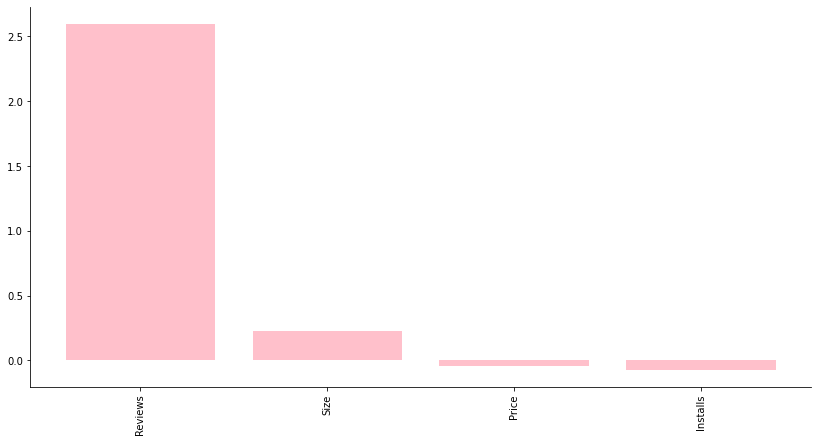

In [106]:
plt.bar(x=importances["Attribute"], height = importances['Importance'], color = 'pink')
plt.xticks(rotation = 'vertical')
plt.show()

In [107]:
import scipy.stats as st
st.t.interval(alpha=.95, df = len(gen_df)-1, loc=np.mean(gen_df["Installs"]))

(7777504.772060779, 7777508.692480064)

In [108]:
st.t.interval(alpha=.95, df = len(gen_df)-1, loc=np.mean(gen_df["Reviews"]))

(216590.60361684067, 216594.52403612545)

In [109]:
st.t.interval(alpha=.95, df = len(gen_df)-1, loc=np.mean(gen_df["Price"]))

(-0.8609105431030819, 3.05950874167434)

In [110]:
st.t.interval(alpha=.95, df = len(gen_df)-1, loc=np.mean(gen_df["Size"]))

(18.38486536537598, 22.305284650153403)

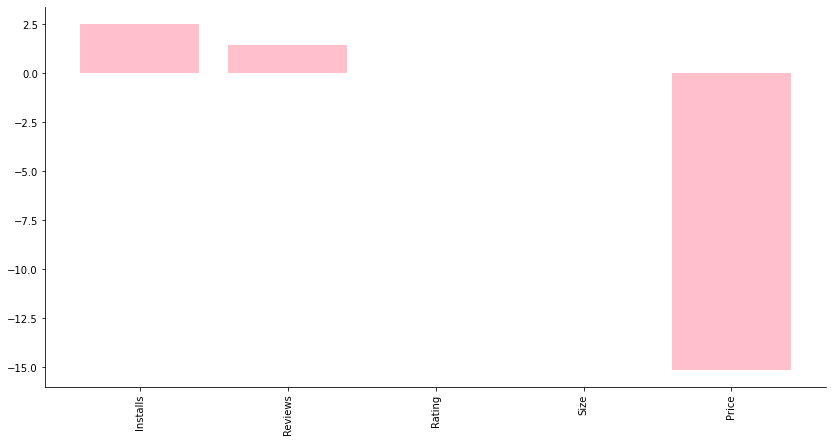

In [111]:
lr_df = knn_df
X = lr_df.drop('Type', axis = 1)
y = lr_df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state = 42)

X_tr_sc = ss.fit_transform(X_train)
X_te_sc = ss.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_tr_sc, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending = False)

plt.bar(x=importances["Attribute"], height = importances['Importance'], color = 'pink')
plt.xticks(rotation = 'vertical')
plt.show()

# GAM

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LogisticGAM

gam_df = df.drop(columns=['Unnamed: 0', 'App', 'Category', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])
gam_df
label_quality = LabelEncoder()
gam_df['Type'] = gam_df['Type'].astype(str)
gam_df['Type'] = label_quality.fit_transform(gam_df['Type'])
gam_df

ModuleNotFoundError: No module named 'pygam'

In [113]:
Na_not_accepted = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

for column in Na_not_accepted:
    mean = int(gam_df[column].mean(skipna=True))
    gam_df[column] = gam_df[column].replace(np.NaN, mean)

NameError: name 'gam_df' is not defined

In [114]:
X = gam_df.iloc[:, 1:5]
y = gam_df.iloc[:, 0]
y = y.array
for i in range(len(y)):
    if y[i] >= 4.5:
        y[i] = 1
    else:
        y[i] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = .2)

NameError: name 'gam_df' is not defined

In [115]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [116]:
LogisticGAM_err = []
gam = LogisticGAM()
gam.fit(X_train , y_train)

NameError: name 'LogisticGAM' is not defined

In [117]:
err = sum(gam.predict(X_test) != y_test)

NameError: name 'gam' is not defined

In [118]:
# error rate
err/len(y_test)

NameError: name 'err' is not defined